In [15]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
pd.options.display.max_columns = 999
pd.options.display.min_rows = 999
csv_in='data/faithful.dat'
df=pd.read_csv(csv_in, sep='\s+', skiprows=25, header=0)
print(df.shape)
print(df.info())
print(df.head())

(272, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 1 to 272
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.4 KB
None
   eruptions  waiting
1      3.600       79
2      1.800       54
3      3.333       74
4      2.283       62
5      4.533       85


In [16]:
df=df.reset_index(drop=True)
display(df.head())

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [17]:
X_scaled = scale(df)
print(X_scaled.mean(axis=0))
print(X_scaled.std(ddof=0,axis=0))

[4.80008190e-16 4.40823848e-16]
[1. 1.]


In [18]:
print(type(X_scaled))
print(X_scaled[:5])

<class 'numpy.ndarray'>
[[ 0.09849886  0.59712344]
 [-1.48145856 -1.24518118]
 [-0.13586149  0.22866251]
 [-1.05750332 -0.6556437 ]
 [ 0.91744345  1.03927655]]


In [19]:
dfX_scaled = pd.DataFrame(X_scaled,columns=df.columns)
print(type(dfX_scaled))
display(dfX_scaled.head())

<class 'pandas.core.frame.DataFrame'>


,eruptions,waiting
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277


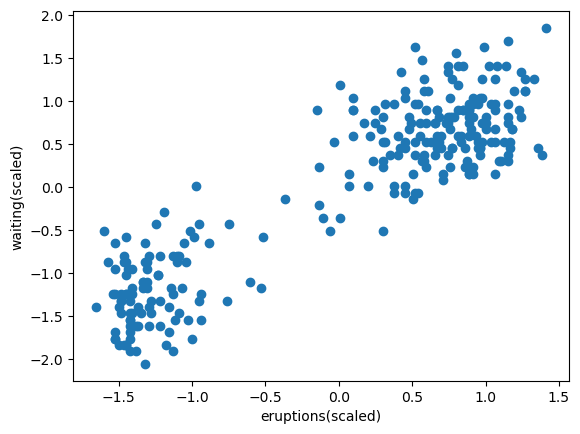

In [20]:
plt.scatter(dfX_scaled['eruptions'],dfX_scaled['waiting'],marker='o')
plt.xlabel('eruptions(scaled)')
plt.ylabel('waiting(scaled)')
plt.show()

C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

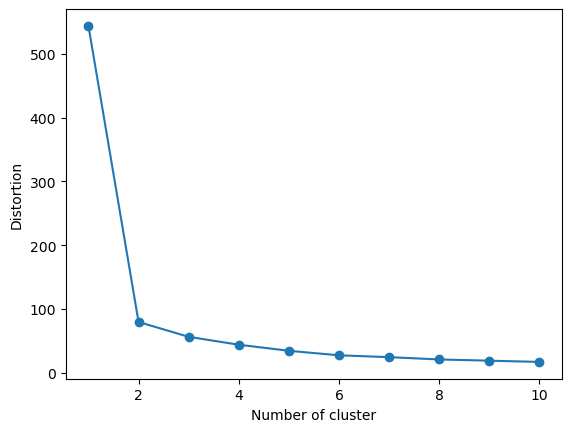

In [21]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10)
    km.fit(dfX_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

In [22]:
n_cls = 2
km = KMeans(n_clusters=n_cls,n_init=10,random_state=10)
cls = km.fit_predict(dfX_scaled)
print(cls)

[1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


C:\Users\iniad\miniconda3\envs\ds2023\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [23]:
df['cluster_no'] = cls
display(df.head())

,eruptions,waiting,cluster_no
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1
3,2.283,62,0
4,4.533,85,1


In [24]:
print(df['cluster_no'].value_counts())

1    174
0     98
Name: cluster_no, dtype: int64


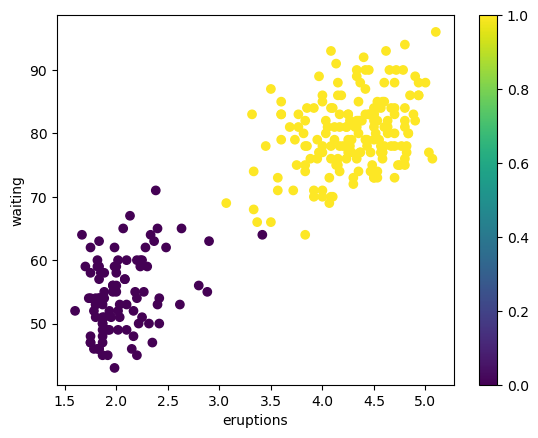

In [25]:
plt.scatter(df['eruptions'],df['waiting'],marker='o',c=df['cluster_no'])
plt.colorbar()
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.show()

In [26]:
print(km.cluster_centers_)

[[-1.26008539 -1.20156744]
 [ 0.70970327  0.67674488]]


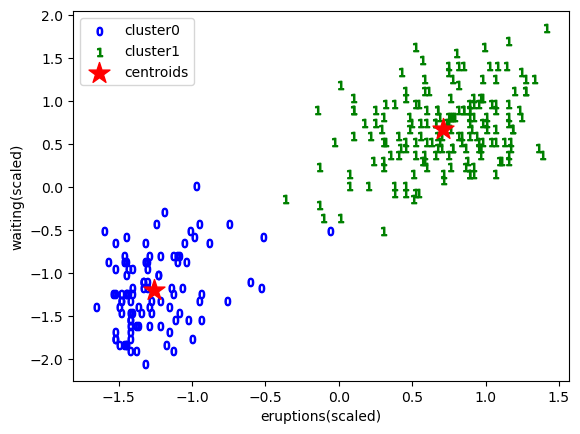

In [27]:
colors = ['blue','green']
for i in range(n_cls):
    df_cls = dfX_scaled[df['cluster_no']==i]
    plt.scatter(df_cls['eruptions'],df_cls['waiting'],color=colors[i],marker='${}$'.format(i),label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',color='red',label='centroids')
plt.xlabel('eruptions(scaled)')
plt.ylabel('waiting(scaled)')
plt.legend()
plt.show()